<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practice Using Time Series Data and Datetime

_Authors: Samuel Stack (DC)_

---

This lab covers the basics of manipulating datetime objects and using datetimes in Pandas.

### 1) Create a datetime object representing today's date.

In [1]:
from datetime import datetime
from datetime import timedelta

# Time this lesson plan was written:
lesson_date = datetime(2018, 4, 30)

In [2]:
lesson_date

datetime.datetime(2018, 4, 30, 0, 0)

### 2) Write a function to print the day of the week for a datetime object.

In [3]:
# This is similar to what Pandas .dt. already uses. Neat, huh?
def day_of_week(date):
#     days_of_week = {0: 'monday', 
#                     1: 'tuesday', 
#                     2: 'wednesday', 
#                     3: 'thursday', 
#                     4: 'friday', 
#                     5: 'saturday', 
#                     6: 'sunday'}
    days_of_week = dict(zip(range(7), ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']))
    return days_of_week[date.weekday()]

day_of_week(lesson_date)

'monday'

### 3) What is the Gregorian ordinal representation of today's date? What is the difference in days between the ordinal representation of today's date and the ordinal representation of your birthday?

> *Hint: Use `.toordinal()` to get the ordinal representation. This calculates the number of days between your birthday and today's date.

In [4]:
datetime(1, 1, 1).toordinal()

1

In [5]:
datetime(-1200, 1, 1).toordinal()

ValueError: year -1200 is out of range

In [6]:
datetime.now().toordinal() - datetime(1987, 1, 7).toordinal()

11618

In [7]:
datetime.now().toordinal()/365
# Let's see how many years ago it started.

2019.1671232876713

### 4) Try using `timedelta()` to shift our datetime object by the following intervals.
- One hour ahead.
- Three days ago.
- One year, three days, two seconds ahead.

In [8]:
print(lesson_date + timedelta(hours=1))

lesson_date - timedelta(days=3)
# OR
print(lesson_date + timedelta(days=-3))
# Adding negative days — so cool!

print(lesson_date + timedelta(days=368, seconds=2))

2018-04-30 01:00:00
2018-04-27 00:00:00
2019-05-03 00:00:02


### 5) Load one of the stock CSVs in the `datasets` folder.

Which you choose is up to you!

In [9]:
import pandas as pd
from datetime import timedelta
%matplotlib inline

# We chose to look at Volkswagon (because it owns Bugatti).
df_vow = pd.read_csv('../datasets/vow.csv')

In [10]:
df_vow.head()

,Date,Open,High,Low,Close,Volume
0,16-Jan-17,150.05,150.70,147.75,148.40,79341
1,13-Jan-17,151.85,154.00,149.95,151.75,112464
2,12-Jan-17,154.05,154.30,148.85,150.70,173155
3,11-Jan-17,149.05,153.65,148.80,153.15,181285
4,10-Jan-17,148.05,149.85,146.60,148.10,137786


### 6) Take a high-level look at the data. Describe it. What are we looking at? 

Use a plotting function to provide a good visual.

In [11]:
df_vow.describe()

,Open,High,Low,Close,Volume
count,255.000000,255.000000,255.000000,255.000000,255.000000
mean,130.380000,132.168235,128.580588,130.415882,96009.898039
std,7.031538,6.992833,7.398405,7.308949,51570.127117
min,110.950000,111.000000,106.650000,108.950000,18273.000000
25%,127.000000,128.600000,125.275000,126.875000,63276.500000
50%,130.450000,131.950000,128.900000,130.450000,84373.000000
75%,134.475000,136.150000,132.575000,134.600000,114860.500000
max,154.050000,154.300000,149.950000,153.150000,374850.000000


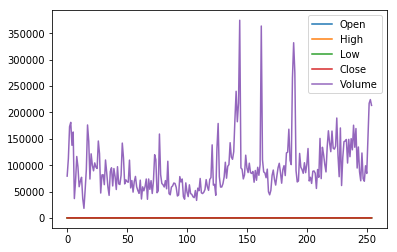

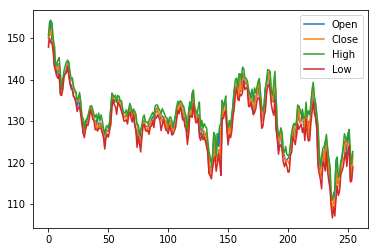

In [12]:
# We're plotting them all at once so... there are going to be some visual issues.
df_vow.plot()
# Volume distorts the visualization because those values are much larger than the prices.

# Let's put all those other ones on a plot.
df_vow[['Open','Close','High','Low']].plot()

### 7) Examine the Date column. Make it the index of the DataFrame.

Making the index a datetime allows us to easily order the data by time. Doing this will result in six Series objects indexed by DateTime — a literal time series!

In [13]:
df_vow.head()

,Date,Open,High,Low,Close,Volume
0,16-Jan-17,150.05,150.70,147.75,148.40,79341
1,13-Jan-17,151.85,154.00,149.95,151.75,112464
2,12-Jan-17,154.05,154.30,148.85,150.70,173155
3,11-Jan-17,149.05,153.65,148.80,153.15,181285
4,10-Jan-17,148.05,149.85,146.60,148.10,137786


In [14]:
# The object type in the date column is a bunch of strings 
# — or at least the first one is.
type(df_vow['Date'].loc[0])

str

In [15]:
df_vow.set_index('Date', inplace=True)
df_vow.index = pd.to_datetime(df_vow.index)

In [16]:
df_vow.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-16,150.05,150.70,147.75,148.40,79341
2017-01-13,151.85,154.00,149.95,151.75,112464
2017-01-12,154.05,154.30,148.85,150.70,173155
2017-01-11,149.05,153.65,148.80,153.15,181285
2017-01-10,148.05,149.85,146.60,148.10,137786


### 8) Add columns with useful data extracted from the DateTime index.

Create at least three columns; one for day, month, and year.


In [17]:
df_vow['Year'] = df_vow.index.year
df_vow['Month'] = df_vow.index.month
df_vow['Day'] = df_vow.index.day

In [18]:
df_vow.head()

,Open,High,Low,Close,Volume,Year,Month,Day
Date,,,,,,,,
2017-01-16,150.05,150.70,147.75,148.40,79341,2017,1,16
2017-01-13,151.85,154.00,149.95,151.75,112464,2017,1,13
2017-01-12,154.05,154.30,148.85,150.70,173155,2017,1,12
2017-01-11,149.05,153.65,148.80,153.15,181285,2017,1,11
2017-01-10,148.05,149.85,146.60,148.10,137786,2017,1,10


### 9) Create a subset of the data containing only 2017 dates.

In [19]:
df_vow['2017']

,Open,High,Low,Close,Volume,Year,Month,Day
Date,,,,,,,,
2017-01-16,150.05,150.70,147.75,148.40,79341,2017,1,16
2017-01-13,151.85,154.00,149.95,151.75,112464,2017,1,13
2017-01-12,154.05,154.30,148.85,150.70,173155,2017,1,12
2017-01-11,149.05,153.65,148.80,153.15,181285,2017,1,11
2017-01-10,148.05,149.85,146.60,148.10,137786,2017,1,10
2017-01-09,143.20,148.15,143.20,148.05,163025,2017,1,9
2017-01-06,142.60,143.25,141.85,142.60,36778,2017,1,6
2017-01-05,141.00,144.00,140.85,143.25,69801,2017,1,5
2017-01-04,143.85,144.75,140.25,142.05,116569,2017,1,4


### 10) [Example] Date ranges and frequencies.

Explore the following built-in methods.
- What does `asfreq` do?
> - _Converts time series to specified frequency._

- What does `resample` do?
> - _This is a convenience method for frequency conversion and the resampling of time series. Object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex) or pass datetime-like values to the `on` or `level` keyword._

We can also create our own date ranges using a built-in function, `date_range()`. The `periods` and `freq` keyword arguments grant the user fine-grained control over the resulting values. To reset the time data, use the `normalize=True` directive.


In [20]:
pd.date_range('3/1/2016', '6/1/2016')

DatetimeIndex(['2016-03-01', '2016-03-02', '2016-03-03', '2016-03-04',
               '2016-03-05', '2016-03-06', '2016-03-07', '2016-03-08',
               '2016-03-09', '2016-03-10', '2016-03-11', '2016-03-12',
               '2016-03-13', '2016-03-14', '2016-03-15', '2016-03-16',
               '2016-03-17', '2016-03-18', '2016-03-19', '2016-03-20',
               '2016-03-21', '2016-03-22', '2016-03-23', '2016-03-24',
               '2016-03-25', '2016-03-26', '2016-03-27', '2016-03-28',
               '2016-03-29', '2016-03-30', '2016-03-31', '2016-04-01',
               '2016-04-02', '2016-04-03', '2016-04-04', '2016-04-05',
               '2016-04-06', '2016-04-07', '2016-04-08', '2016-04-09',
               '2016-04-10', '2016-04-11', '2016-04-12', '2016-04-13',
               '2016-04-14', '2016-04-15', '2016-04-16', '2016-04-17',
               '2016-04-18', '2016-04-19', '2016-04-20', '2016-04-21',
               '2016-04-22', '2016-04-23', '2016-04-24', '2016-04-25',
      

In [21]:
# Specify a start point and how many periods should come after.
pd.date_range(start='3/1/2016', periods=20)

DatetimeIndex(['2016-03-01', '2016-03-02', '2016-03-03', '2016-03-04',
               '2016-03-05', '2016-03-06', '2016-03-07', '2016-03-08',
               '2016-03-09', '2016-03-10', '2016-03-11', '2016-03-12',
               '2016-03-13', '2016-03-14', '2016-03-15', '2016-03-16',
               '2016-03-17', '2016-03-18', '2016-03-19', '2016-03-20'],
              dtype='datetime64[ns]', freq='D')

In [22]:
# Specify an end point and how many periods should come before.
pd.date_range(end='6/1/2016', periods=20)

DatetimeIndex(['2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16',
               '2016-05-17', '2016-05-18', '2016-05-19', '2016-05-20',
               '2016-05-21', '2016-05-22', '2016-05-23', '2016-05-24',
               '2016-05-25', '2016-05-26', '2016-05-27', '2016-05-28',
               '2016-05-29', '2016-05-30', '2016-05-31', '2016-06-01'],
              dtype='datetime64[ns]', freq='D')

In [23]:
# Frequency specifies the length of the periods
# — the default, "D," being daily. We understand that BM is bimonthly.
pd.date_range('1/1/2016', '12/1/2016', freq='BM')

DatetimeIndex(['2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31', '2016-06-30', '2016-07-29', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [24]:
pd.date_range('3/7/2016 12:56:31', periods=6)

DatetimeIndex(['2016-03-07 12:56:31', '2016-03-08 12:56:31',
               '2016-03-09 12:56:31', '2016-03-10 12:56:31',
               '2016-03-11 12:56:31', '2016-03-12 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [25]:
# Normalize creates normal daily times and will set the default time for each day as midnight.
pd.date_range('3/7/2012 12:56:31', periods=6, normalize=True)

DatetimeIndex(['2012-03-07', '2012-03-08', '2012-03-09', '2012-03-10',
               '2012-03-11', '2012-03-12'],
              dtype='datetime64[ns]', freq='D')

We are also given a `Period` object, which can be used to represent a time interval. The `Period` object consists of a start time and an end time and can be created by providing a start time and a given frequency.

In [26]:
# Our start period was March 2016 and our period frequency is months.
march_2016 = pd.Period('2016-03', freq='M')

print(march_2016.start_time)
print(march_2016.end_time)

2016-03-01 00:00:00
2016-03-31 23:59:59.999999999
